In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Завантаження даних

In [2]:
df = pd.read_csv('archive/internet_service_churn.csv')
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


## Дослідження даних

Досліджуємо розмірність датасету

In [3]:
df.shape

(72274, 11)

Досліджуємо загальну інформацію про датасет

In [4]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8 non-null      float64
 1   is_tv_subscriber             8 non-null      float64
 2   is_movie_package_subscriber  8 non-null      float64
 3   subscription_age             8 non-null      float64
 4   bill_avg                     8 non-null      float64
 5   reamining_contract           8 non-null      float64
 6   service_failure_count        8 non-null      float64
 7   download_avg                 8 non-null      float64
 8   upload_avg                   8 non-null      float64
 9   download_over_limit          8 non-null      float64
 10  churn                        8 non-null      float64
dtypes: float64(11)
memory usage: 768.0+ bytes


Переглядаємо скільки маємо пропущених даних

In [5]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

Досліджуємо типи даних датасету

In [6]:
df.dtypes

id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
reamining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object

Досліджуємо основні характеристики датасету

In [7]:
df[['is_tv_subscriber', 
    'is_movie_package_subscriber',
    'subscription_age',
    'bill_avg',
    'reamining_contract',
    'service_failure_count',
    'download_avg',
    'upload_avg',
    'download_over_limit']].describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
count,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000
mean,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613
std,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000
75%,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000
max,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000


Перевіряємо наявність дублікатів даних

In [8]:
df['id'].duplicated().sum()

0

Перевіряємо зміст даних датасету

In [9]:
df.nunique()

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
reamining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

## Візуалізація даних

Будуємо кореляційну матрицю

In [10]:
correlation  = df[['is_tv_subscriber', 'is_movie_package_subscriber',
                   'subscription_age', 'bill_avg', 'reamining_contract',
                   'service_failure_count', 'download_avg', 'upload_avg',
                   'download_over_limit', 'churn']].corr()

correlation

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
is_tv_subscriber,1.000000,0.337435,0.087276,-0.076245,0.178814,-0.016041,0.131650,0.065791,-0.103546,-0.327582
is_movie_package_subscriber,0.337435,1.000000,0.131986,-0.022534,0.319179,0.013345,0.160590,0.093251,-0.026352,-0.307167
subscription_age,0.087276,0.131986,1.000000,0.067329,0.039269,0.003449,0.069331,0.030277,0.023694,-0.122441
bill_avg,-0.076245,-0.022534,0.067329,1.000000,-0.057088,0.101270,0.431674,0.334236,-0.232738,-0.021058
reamining_contract,0.178814,0.319179,0.039269,-0.057088,1.000000,-0.012571,0.167568,0.073651,-0.050014,-0.625450
service_failure_count,-0.016041,0.013345,0.003449,0.101270,-0.012571,1.000000,0.080483,0.070699,0.004947,0.021575
download_avg,0.131650,0.160590,0.069331,0.431674,0.167568,0.080483,1.000000,0.554436,-0.114322,-0.298063
upload_avg,0.065791,0.093251,0.030277,0.334236,0.073651,0.070699,0.554436,1.000000,-0.069192,-0.162690
download_over_limit,-0.103546,-0.026352,0.023694,-0.232738,-0.050014,0.004947,-0.114322,-0.069192,1.000000,0.158318
churn,-0.327582,-0.307167,-0.122441,-0.021058,-0.625450,0.021575,-0.298063,-0.162690,0.158318,1.000000


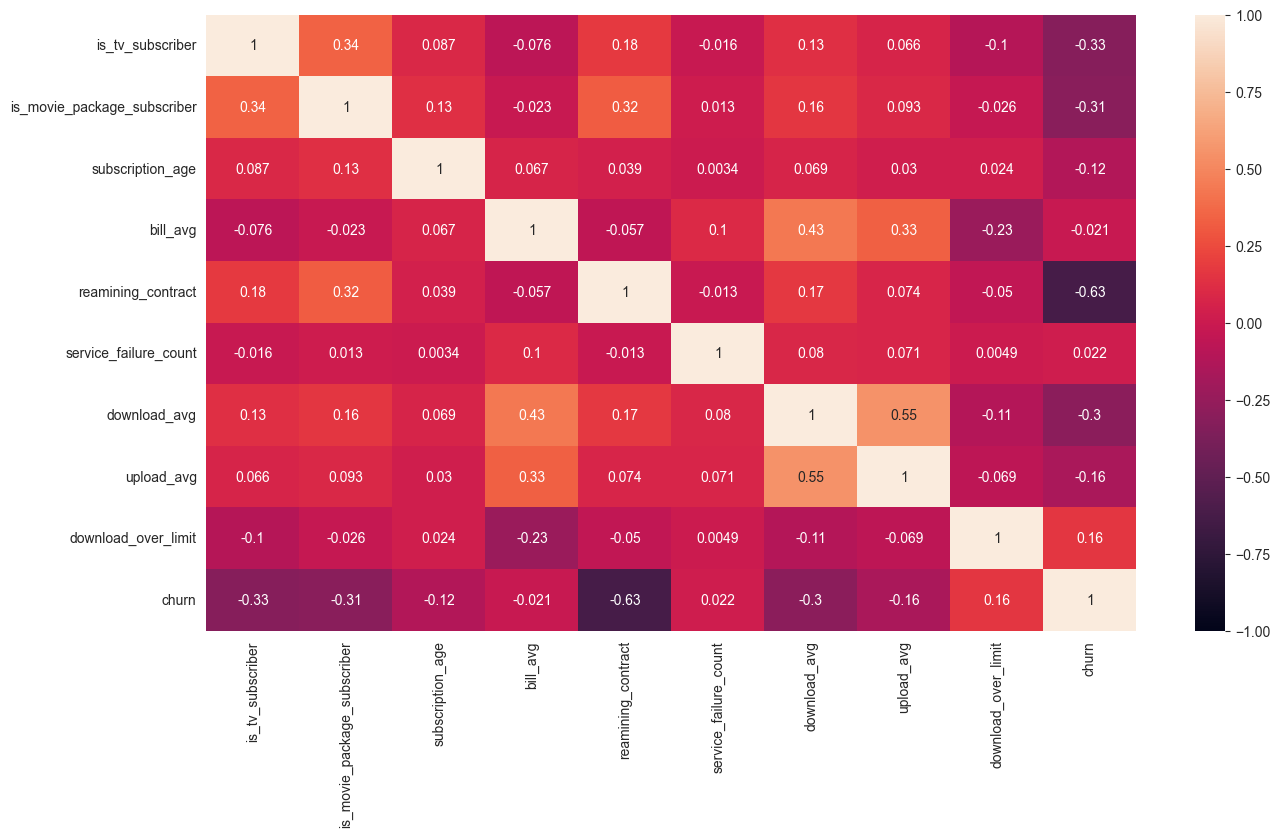

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True);plt.show()

Відображаєм графічно жалежності згідно з кореляційною матрицею

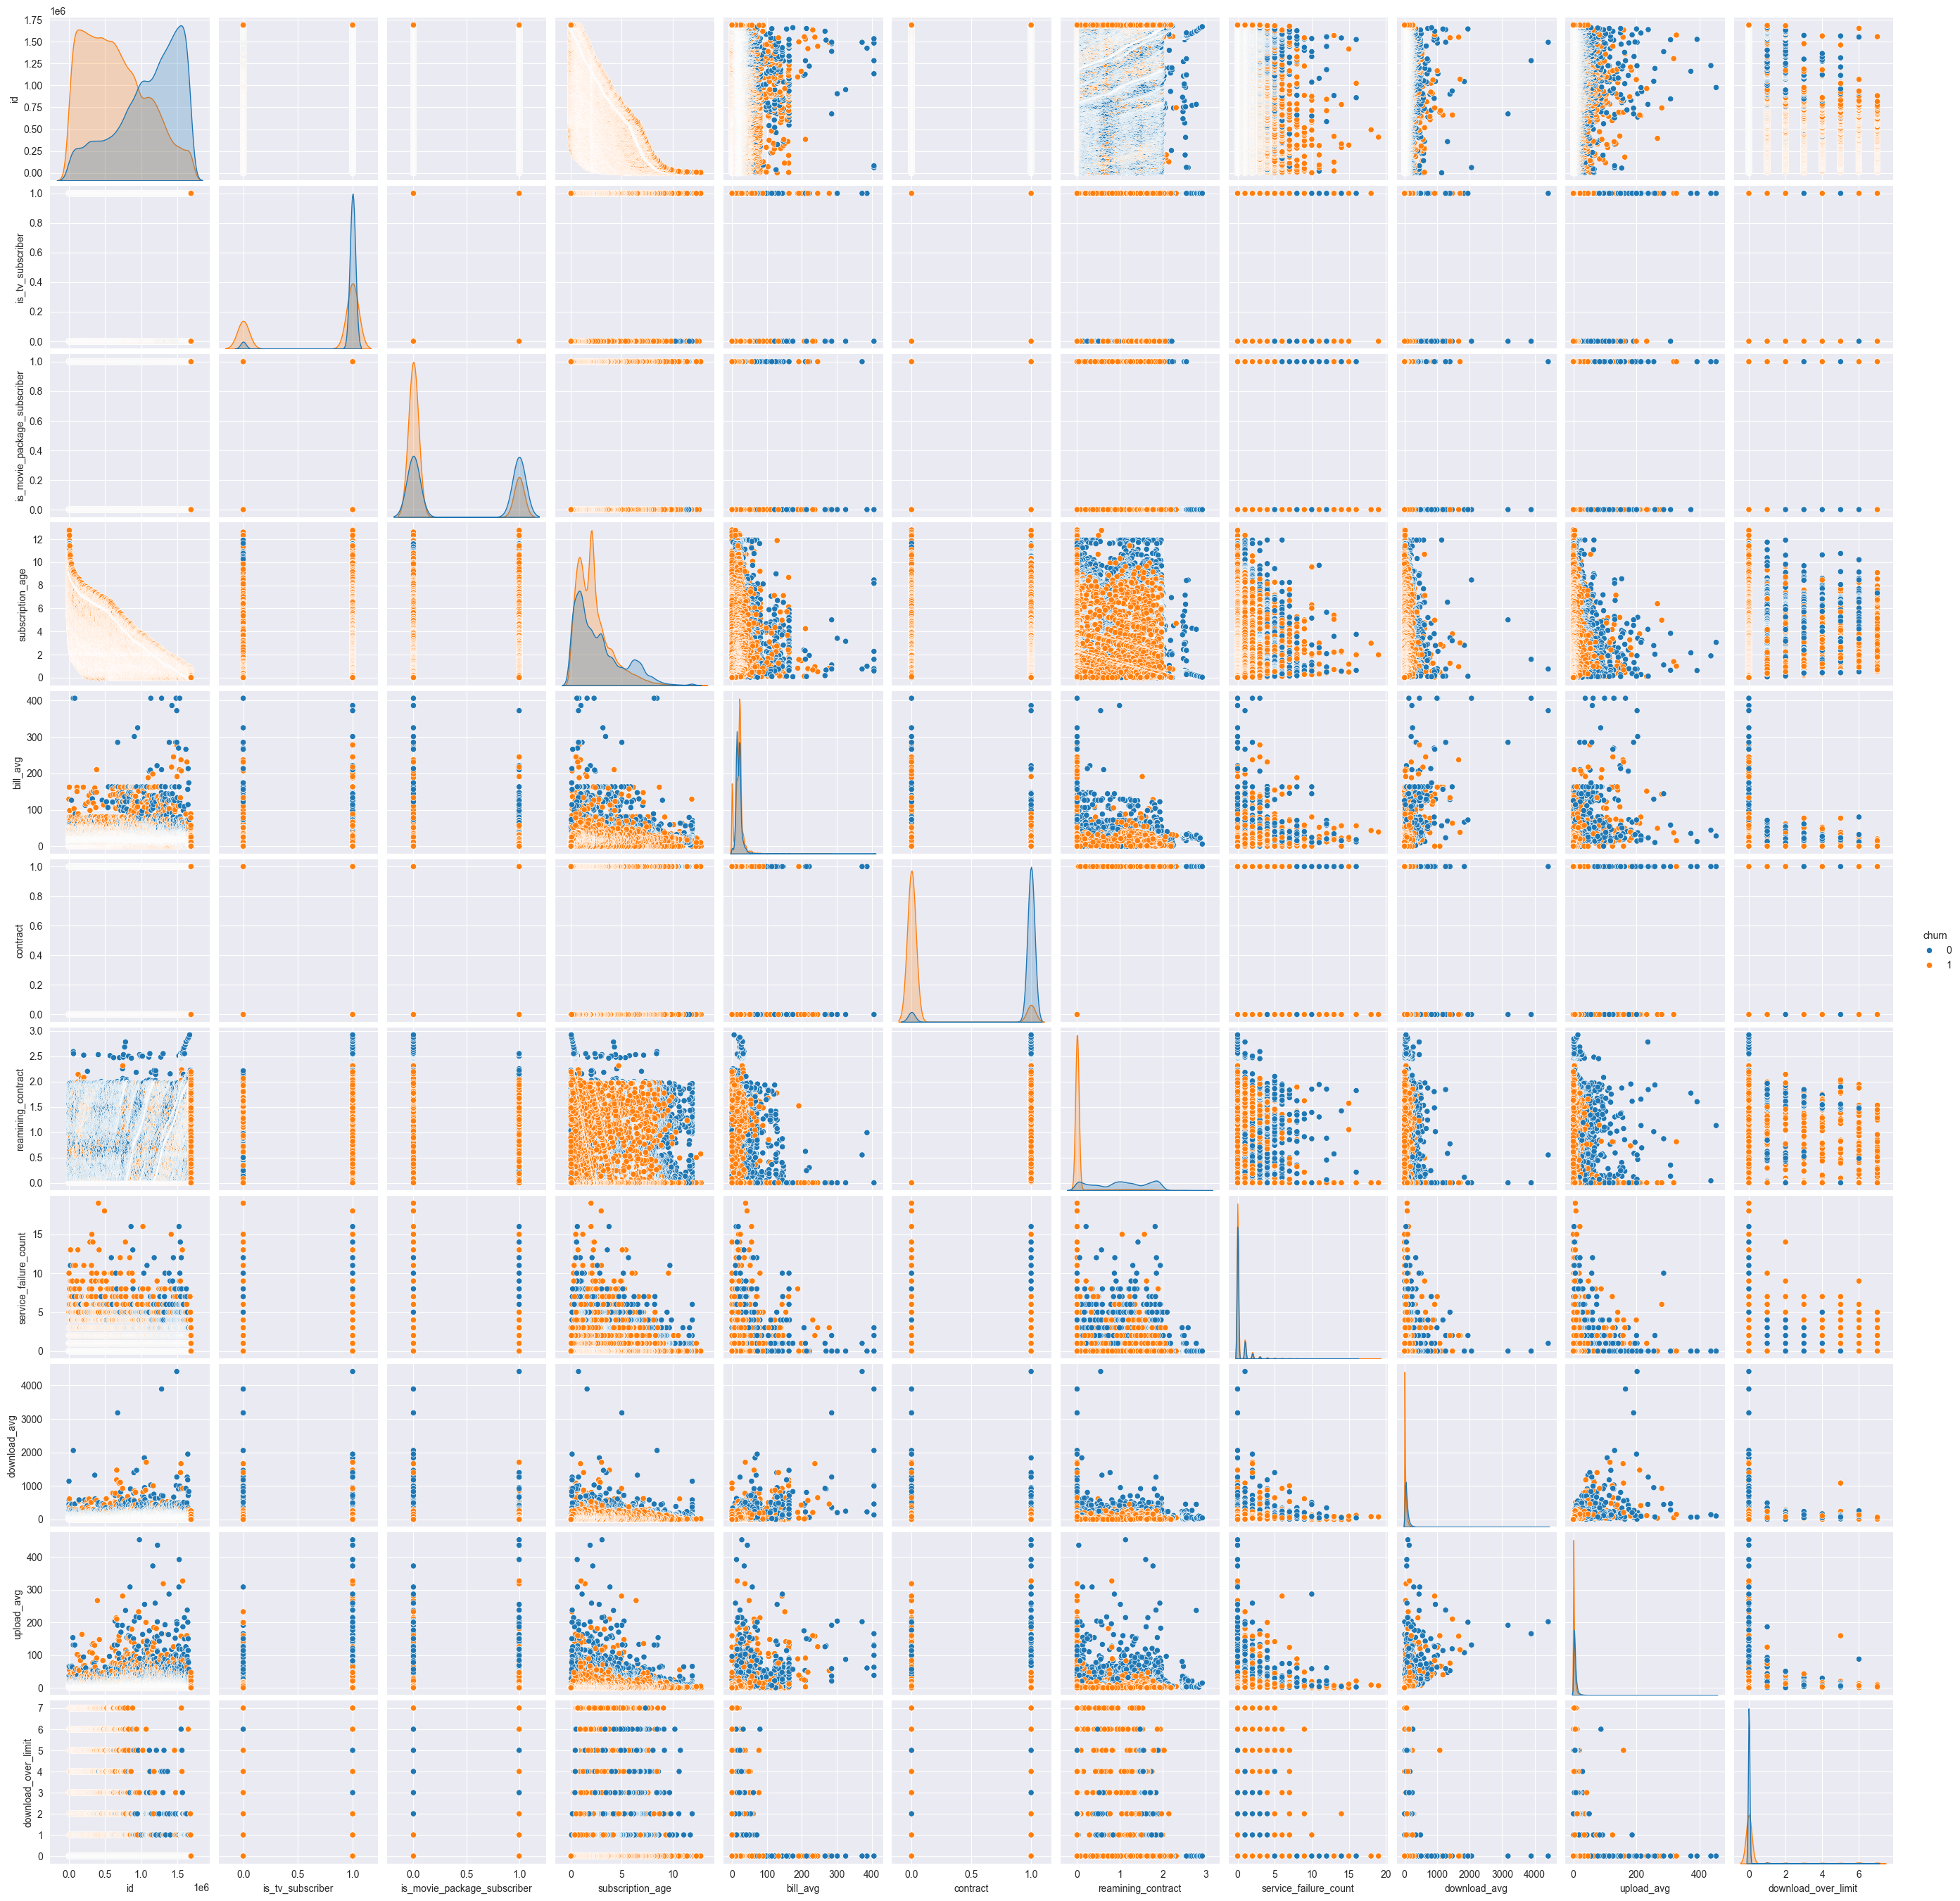

In [199]:
sns.pairplot(df,hue="churn")
plt.show() 

<Axes: xlabel='subscription_age', ylabel='download_avg'>

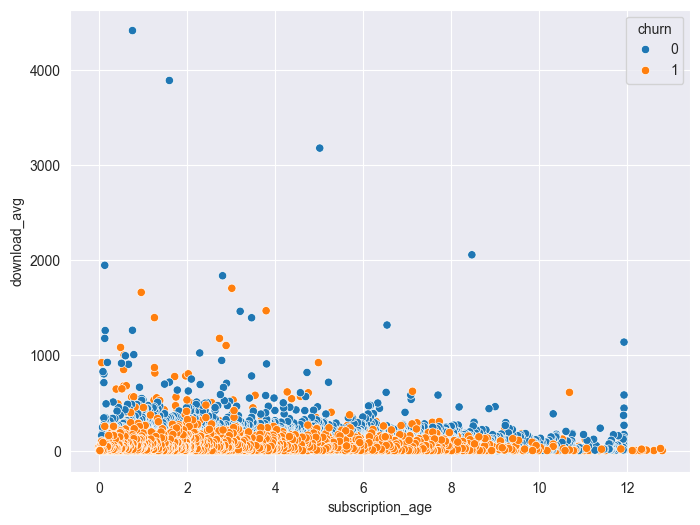

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='subscription_age', y='download_avg', hue="churn", data=df)

<Axes: xlabel='download_avg', ylabel='reamining_contract'>

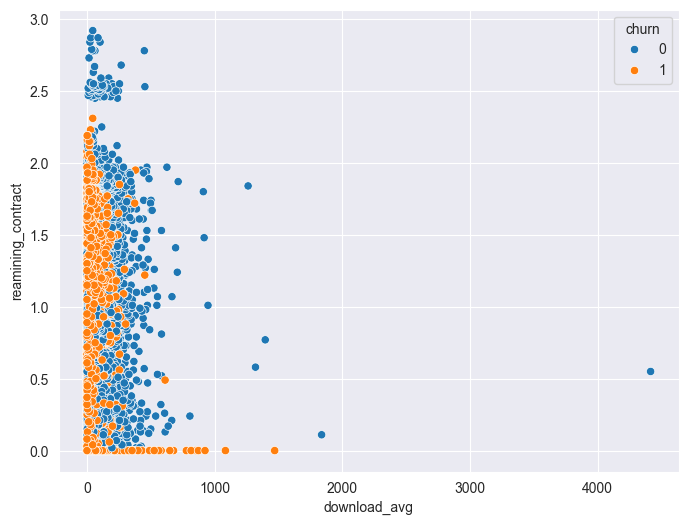

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='download_avg', y='reamining_contract', hue="churn", data=df)

<Axes: xlabel='bill_avg', ylabel='count'>

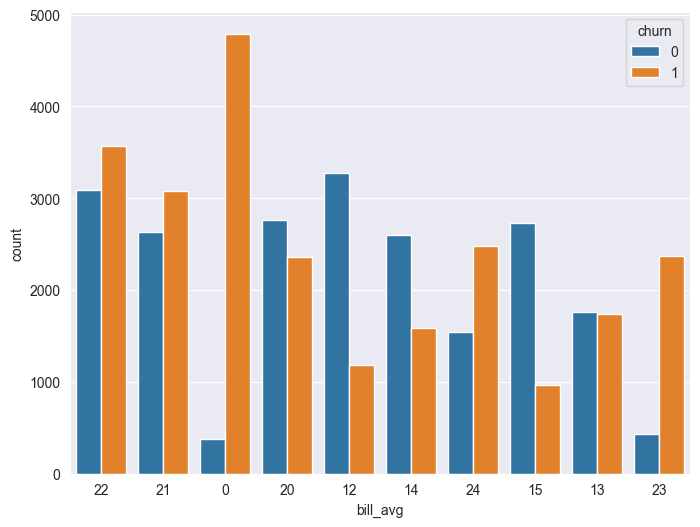

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='bill_avg', hue="churn", data=df, order=df['bill_avg'].value_counts().iloc[:10].index)

<Axes: xlabel='subscription_age', ylabel='count'>

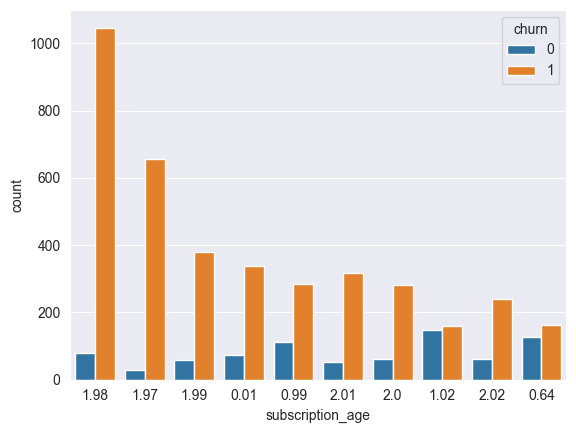

In [16]:
sns.countplot(x='subscription_age', hue="churn", data=df, order=df['subscription_age'].value_counts().iloc[:10].index)

<Axes: xlabel='service_failure_count', ylabel='count'>

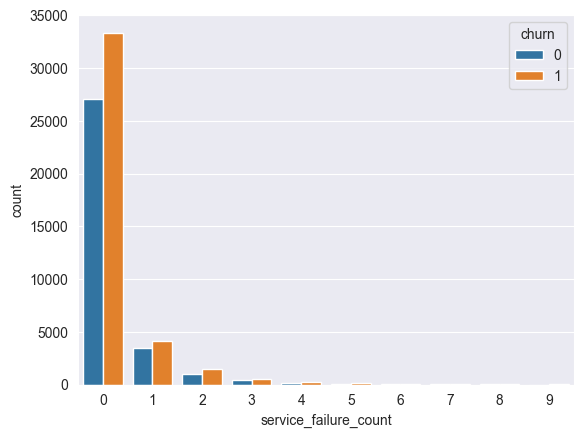

In [17]:
sns.countplot(x='service_failure_count', hue="churn", data=df, order=df['service_failure_count'].value_counts().iloc[:10].index)

<Axes: xlabel='reamining_contract', ylabel='count'>

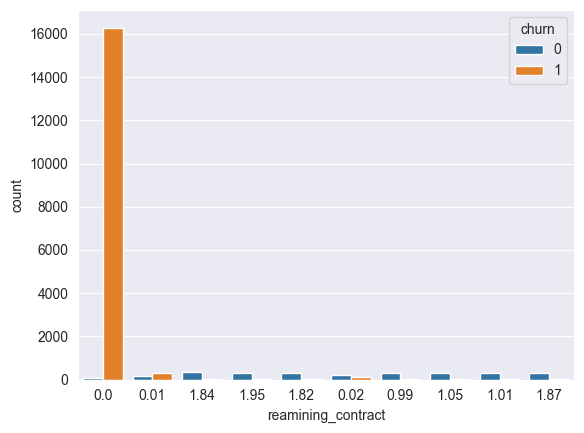

In [18]:
sns.countplot(x='reamining_contract', hue="churn", data=df, order=df['reamining_contract'].value_counts().iloc[:10].index)

## Попередня обробка даних

Створємо нову фічу, яка показує чи є у користувача укладений контракт з компанією чи ні.

In [19]:
df['contract'] = df['reamining_contract'].apply(lambda x: 0 if pd.isna(x) or x == 0 else 1)
df.insert(5, 'contract', df.pop('contract'))
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,contract,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,NaN,0,0.0,0.0,0,1


Замінюємо пропущені дані в колонці reamining_contract на нуль

In [20]:
df['reamining_contract'] = df['reamining_contract'].fillna(0)
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,contract,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,0.00,0,0.0,0.0,0,1


Замінюємо на 0, пропущені дані в колонках download_avg та upload_avg

In [109]:
df['download_avg'] = df['download_avg'].fillna(0)
df['upload_avg'] = df['upload_avg'].fillna(0)
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,contract,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,0.00,0,0.0,0.0,0,1


In [110]:
df.shape

(72274, 12)

Розділяємо датасет на тренуваль, валідаційні та перевірочні дані.
Вибираємо для перевірочних даних рандомно 500 екземплярів, решту розділяєм на тренувальний та валідаційний датасети.
Застосовуємо до даних SMOTE oversampling.

In [111]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [112]:
test_df = df.sample(n=5000, random_state=1)
train_df = df.drop(test_df.index)

In [118]:
test_X = test_df.drop(test_df[['churn']], axis=1)
test_Y = test_df['churn']

In [119]:
X = train_df.drop(df[['churn']], axis=1)
Y = train_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((47091, 11), (20183, 11))

In [120]:
smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

## LogisticRegression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Маштабуємо дані для всіх моделей

In [123]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

Підбираємо оптимальні параметри для моделі лінійної рересії

In [128]:
param_grid = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],             
}

In [129]:
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........................C=0.0001;, score=0.930 total time=   0.0s
[CV 2/5] END ..........................C=0.0001;, score=0.924 total time=   0.0s
[CV 3/5] END ..........................C=0.0001;, score=0.929 total time=   0.0s
[CV 4/5] END ..........................C=0.0001;, score=0.930 total time=   0.0s
[CV 5/5] END ..........................C=0.0001;, score=0.911 total time=   0.0s
[CV 1/5] END ...........................C=0.001;, score=0.933 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.929 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.934 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.936 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.911 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.934 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

{'C': 0.1}

In [130]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

In [133]:
model = LogisticRegression(C=0.1)
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.933557944805034
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9087
           1       0.96      0.92      0.94     11096

    accuracy                           0.93     20183
   macro avg       0.93      0.93      0.93     20183
weighted avg       0.93      0.93      0.93     20183



In [135]:
param_grid = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],             
}
grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........................C=0.0001;, score=0.921 total time=   0.0s
[CV 2/5] END ..........................C=0.0001;, score=0.917 total time=   0.0s
[CV 3/5] END ..........................C=0.0001;, score=0.920 total time=   0.0s
[CV 4/5] END ..........................C=0.0001;, score=0.921 total time=   0.0s
[CV 5/5] END ..........................C=0.0001;, score=0.899 total time=   0.0s
[CV 1/5] END ...........................C=0.001;, score=0.924 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.919 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.922 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.924 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.898 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.934 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

{'C': 0.1}

In [136]:
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9335083981568647
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9087
           1       0.96      0.92      0.94     11096

    accuracy                           0.93     20183
   macro avg       0.93      0.93      0.93     20183
weighted avg       0.93      0.93      0.93     20183



In [137]:
param_grid = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]   
}
grid = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga'), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END ............C=0.0001, l1_ratio=0.1;, score=0.928 total time=   0.1s
[CV 2/5] END ............C=0.0001, l1_ratio=0.1;, score=0.923 total time=   0.1s
[CV 3/5] END ............C=0.0001, l1_ratio=0.1;, score=0.928 total time=   0.0s
[CV 4/5] END ............C=0.0001, l1_ratio=0.1;, score=0.928 total time=   0.0s
[CV 5/5] END ............C=0.0001, l1_ratio=0.1;, score=0.908 total time=   0.0s
[CV 1/5] END ............C=0.0001, l1_ratio=0.2;, score=0.924 total time=   0.0s
[CV 2/5] END ............C=0.0001, l1_ratio=0.2;, score=0.919 total time=   0.0s
[CV 3/5] END ............C=0.0001, l1_ratio=0.2;, score=0.923 total time=   0.0s
[CV 4/5] END ............C=0.0001, l1_ratio=0.2;, score=0.924 total time=   0.0s
[CV 5/5] END ............C=0.0001, l1_ratio=0.2;, score=0.902 total time=   0.0s
[CV 1/5] END ............C=0.0001, l1_ratio=0.3;, score=0.921 total time=   0.0s
[CV 2/5] END ............C=0.0001, l1_ratio=0.3

{'C': 0.1, 'l1_ratio': 0.5}

In [138]:
model = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.933557944805034
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9087
           1       0.96      0.92      0.94     11096

    accuracy                           0.93     20183
   macro avg       0.93      0.93      0.93     20183
weighted avg       0.93      0.93      0.93     20183



In [139]:
test_X_scaler = scaler.transform(test_X)

y_pred = model.predict(test_X_scaler)

print(accuracy_score(test_Y, y_pred))

print(classification_report(test_Y, y_pred))

0.9274
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2239
           1       0.95      0.91      0.93      2761

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



In [140]:
from sklearn.metrics import confusion_matrix

Text(0.5, 3.722222222222216, 'Predicted')

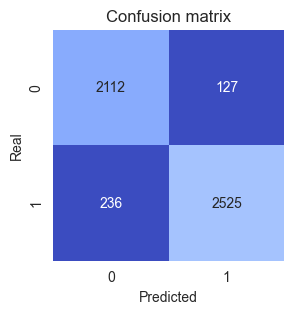

In [141]:
cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Як можемо бачити по виведених вище підсумках, модель сформована на лінійній регресії показує точніть передбачення у 93%.
Тож, зберігаємо модель.

In [146]:
from pathlib import Path

Path('../models').mkdir(parents=True, exist_ok=True)

In [147]:
import joblib

joblib.dump(model,'../models/LR_model_Olesia.pkl')

['../models/LR_model_Olesia.pkl']

### Linear SVC for big dataset

In [148]:
from sklearn.svm import LinearSVC

Підбираємо оптимальні параметри

In [150]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

In [151]:
grid = GridSearchCV(LinearSVC(loss='squared_hinge'), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, penalty=l1;, score=0.935 total time=   0.1s
[CV 2/5] END .................C=0.1, penalty=l1;, score=0.932 total time=   0.1s
[CV 3/5] END .................C=0.1, penalty=l1;, score=0.937 total time=   0.1s
[CV 4/5] END .................C=0.1, penalty=l1;, score=0.937 total time=   0.1s
[CV 5/5] END .................C=0.1, penalty=l1;, score=0.910 total time=   0.1s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.935 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.932 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.937 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.937 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.910 total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l1;, score=0.935 total time=   0.1s
[CV 2/5] END ...................C=1, penalty=l1;,

{'C': 0.1, 'penalty': 'l2'}

Тренуємо модель

In [157]:
model = LinearSVC(C=0.1, penalty='l2')

model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9349947976019423
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9087
           1       0.95      0.93      0.94     11096

    accuracy                           0.93     20183
   macro avg       0.93      0.94      0.93     20183
weighted avg       0.94      0.93      0.94     20183



Перевіряємо модель на перевірочному датасеті

In [158]:
test_X_scaler = scaler.transform(test_X)

y_pred = model.predict(test_X_scaler)

print(accuracy_score(test_Y, y_pred))

print(classification_report(test_Y, y_pred))

0.9284
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2239
           1       0.95      0.92      0.93      2761

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



Text(0.5, 3.722222222222216, 'Predicted')

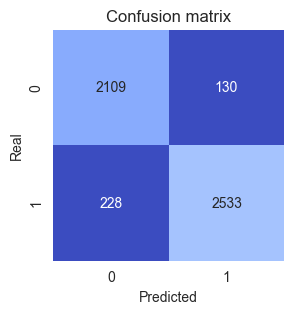

In [159]:
cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Лінійна модель опорних векторів показала себе теж досить непогано та має точність передбачення у 93%.
Тож, також збережемо дану модель.

In [160]:
joblib.dump(model,'../models/LSVC_model_Olesia.pkl')

['../models/LSVC_model_Olesia.pkl']

### Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

Підбираємо оптимальні параметри для моделі

In [192]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [193]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....................criterion=gini;, score=0.967 total time=   0.1s
[CV 2/5] END ....................criterion=gini;, score=0.970 total time=   0.1s
[CV 3/5] END ....................criterion=gini;, score=0.963 total time=   0.1s
[CV 4/5] END ....................criterion=gini;, score=0.968 total time=   0.1s
[CV 5/5] END ....................criterion=gini;, score=0.964 total time=   0.1s
[CV 1/5] END .................criterion=entropy;, score=0.969 total time=   0.2s
[CV 2/5] END .................criterion=entropy;, score=0.974 total time=   0.2s
[CV 3/5] END .................criterion=entropy;, score=0.965 total time=   0.2s
[CV 4/5] END .................criterion=entropy;, score=0.974 total time=   0.2s
[CV 5/5] END .................criterion=entropy;, score=0.980 total time=   0.2s
[CV 1/5] END ................criterion=log_loss;, score=0.969 total time=   0.2s
[CV 2/5] END ................criterion=log_loss;,

{'criterion': 'log_loss'}

Навчаємо модель та тестуємо на валідаційних даних

In [194]:
model = DecisionTreeClassifier(criterion='log_loss')

selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

linear_X_train_selected = selector.transform(X_train)
linear_X_test_selected = selector.transform(X_test)

model.fit(linear_X_train_selected, y_train)
y_pred = model.predict(linear_X_test_selected)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9750284893226974
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9087
           1       0.98      0.98      0.98     11096

    accuracy                           0.98     20183
   macro avg       0.97      0.97      0.97     20183
weighted avg       0.98      0.98      0.98     20183



In [195]:
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.973195263340435
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9087
           1       0.98      0.97      0.98     11096

    accuracy                           0.97     20183
   macro avg       0.97      0.97      0.97     20183
weighted avg       0.97      0.97      0.97     20183



Тестуємо модель на перевірочних даних

In [196]:
test_X_scaler = scaler.transform(test_X)

y_pred = model.predict(test_X_scaler)

print(accuracy_score(test_Y, y_pred))

print(classification_report(test_Y, y_pred))

0.9744
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2239
           1       0.98      0.98      0.98      2761

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



Text(0.5, 3.722222222222216, 'Predicted')

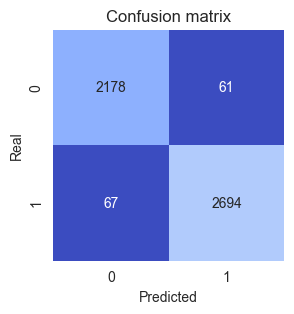

In [197]:
cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Сформавана модель на основі дерева рішень показала один із найкращих результатів при тестуванні, а саме 97%, тому зберігаємо її

In [198]:
joblib.dump(model,'../models/DTC_model_Olesia.pkl')

['../models/DTC_model_Olesia.pkl']

### Random Forest Classifier

In [168]:
from sklearn.ensemble import RandomForestClassifier

Підбираємо найкрщі параметри для моделі

In [169]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 4, 8],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, refit=True, verbose=2, cv=5)

grid_search.fit(X_train_scaler, y_train)

grid_search.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=5, min_samples_leaf

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

Навчаємо та тренуємо модель

In [170]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9450527671803003
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9087
           1       0.96      0.94      0.95     11096

    accuracy                           0.95     20183
   macro avg       0.94      0.95      0.94     20183
weighted avg       0.95      0.95      0.95     20183



Тестуємо модель на перевірочному датасеті

In [171]:
test_X_scaler = scaler.transform(test_X)

y_pred = model.predict(test_X_scaler)

print(accuracy_score(test_Y, y_pred))

print(classification_report(test_Y, y_pred))

0.9398
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2239
           1       0.95      0.94      0.95      2761

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



Text(0.5, 3.722222222222216, 'Predicted')

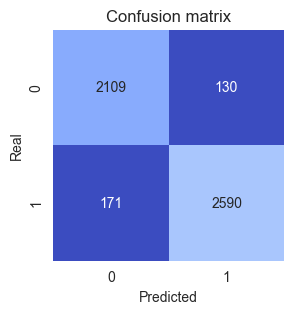

In [172]:
cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Модель "Випадковий ліс" показала точність передбачення у розмірі 94%, тож зберігаємо модель.

In [173]:
joblib.dump(model,'../models/RF_model_Olesia.pkl')

['../models/RF_model_Olesia.pkl']

### Neural Network

Формуємо та вибираємо модель нейронної мережі з найкращими параметрами

In [177]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4931 - loss: 9675.0957 - val_accuracy: 0.6253 - val_loss: 225.0083
Epoch 2/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4957 - loss: 236.4521 - val_accuracy: 0.6500 - val_loss: 4.1555
Epoch 3/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5344 - loss: 22.1507 - val_accuracy: 0.7023 - val_loss: 0.6729
Epoch 4/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6580 - loss: 0.7936 - val_accuracy: 0.5274 - val_loss: 0.8331
Epoch 5/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6868 - loss: 0.6408 - val_accuracy: 0.4163 - val_loss: 0.8158
Epoch 6/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6533 - loss: 0.6457 - val_accuracy: 0.3750 - val_loss: 0.8719
Epoch 7/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6218 - loss: 0.6824 - val_accuracy: 0.3750 - val_loss: 0.7257
Epoch 8/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5550 - loss: 0

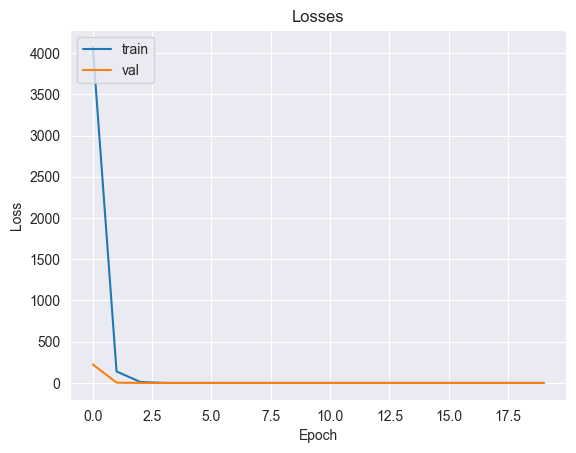

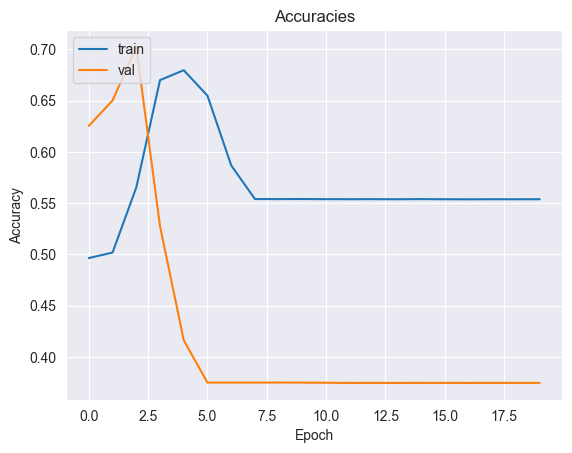

In [178]:
history = model.fit(
    X_train, y_train, epochs=20,
    batch_size=32,
    validation_split=0.3
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [179]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9213 - loss: 0.2574 - val_accuracy: 0.9184 - val_loss: 0.2262
Epoch 2/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9329 - loss: 0.2025 - val_accuracy: 0.9302 - val_loss: 0.1823
Epoch 3/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9325 - loss: 0.1958 - val_accuracy: 0.9215 - val_loss: 0.1798
Epoch 4/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9328 - loss: 0.1825 - val_accuracy: 0.9145 - val_loss: 0.1589
Epoch 5/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9388 - loss: 0.1573 - val_accuracy: 0.9269 - val_loss: 0.1350
Epoch 6/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9489 - loss: 0.1356 - val_accuracy: 0.9430 - val_loss: 0.1156
Epoch 7/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9534 - loss: 0.1248 - val_accuracy: 0.9426 - val_loss: 0.1094
Epoch 8/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9558 - loss: 0.1154 - 

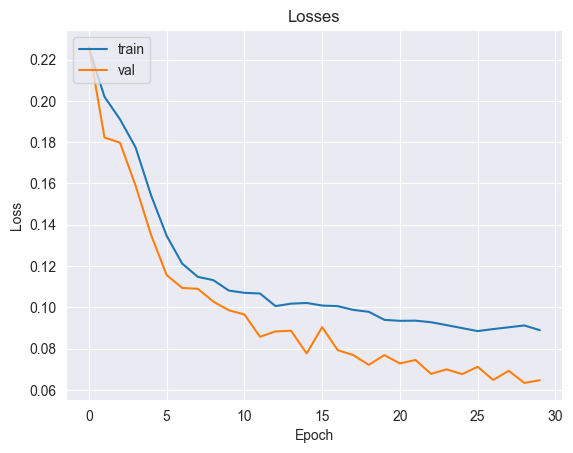

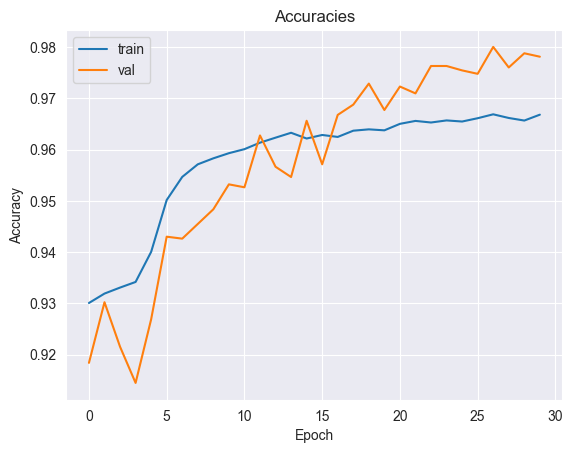

In [180]:
history = model.fit(
    X_train_scaler, y_train, epochs=30,
    batch_size=32,
    validation_split=0.2,
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [181]:
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8091 - loss: 0.5977 - val_accuracy: 0.9234 - val_loss: 0.3851
Epoch 2/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9288 - loss: 0.3794 - val_accuracy: 0.9266 - val_loss: 0.3509
Epoch 3/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9300 - loss: 0.3624 - val_accuracy: 0.9292 - val_loss: 0.3319
Epoch 4/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9309 - loss: 0.3490 - val_accuracy: 0.9292 - val_loss: 0.3227
Epoch 5/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9306 - loss: 0.3363 - val_accuracy: 0.9321 - val_loss: 0.3100
Epoch 6/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9303 - loss: 0.3243 - val_accuracy: 0.9333 - val_loss: 0.2995
Epoch 7/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9323 - loss: 0.3133 - val_accuracy: 0.9331 - val_loss: 0.2935
Epoch 8/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9350 - loss: 0.2990 - 

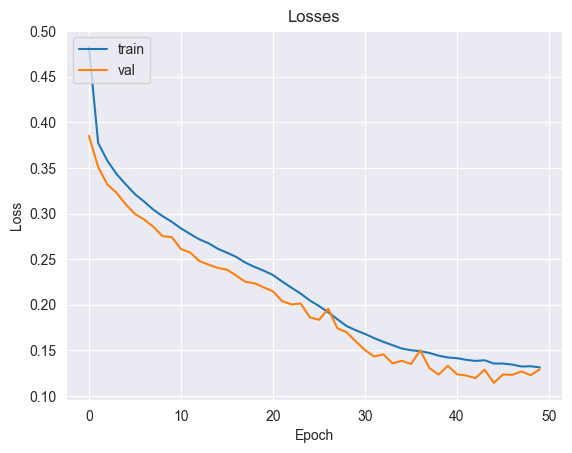

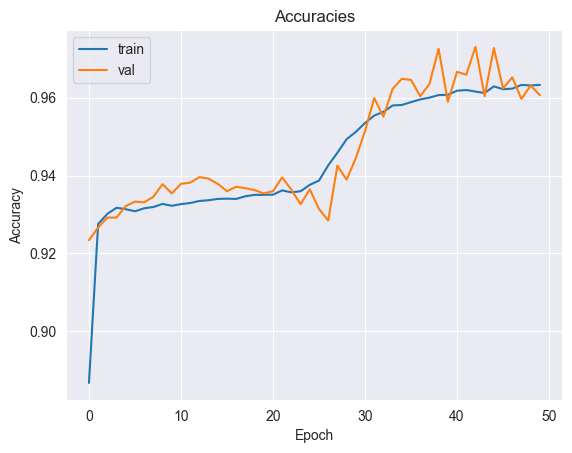

In [182]:
history = model.fit(
    X_train_scaler, y_train, epochs=50,
    batch_size=32,
    validation_split=0.2,
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [183]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8649 - loss: 0.3484 - val_accuracy: 0.9228 - val_loss: 0.2140
Epoch 2/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9295 - loss: 0.2146 - val_accuracy: 0.9201 - val_loss: 0.1861
Epoch 3/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9315 - loss: 0.2005 - val_accuracy: 0.9236 - val_loss: 0.1774
Epoch 4/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9341 - loss: 0.1851 - val_accuracy: 0.9245 - val_loss: 0.1675
Epoch 5/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9345 - loss: 0.1675 - val_accuracy: 0.9193 - val_loss: 0.1536
Epoch 6/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9423 - loss: 0.1439 - val_accuracy: 0.9252 - val_loss: 0.1279
Epoch 7/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9494 - loss: 0.1289 - val_accuracy: 0.9285 - val_loss: 0.1344
Epoch 8/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9533 - loss: 0.1181 - 

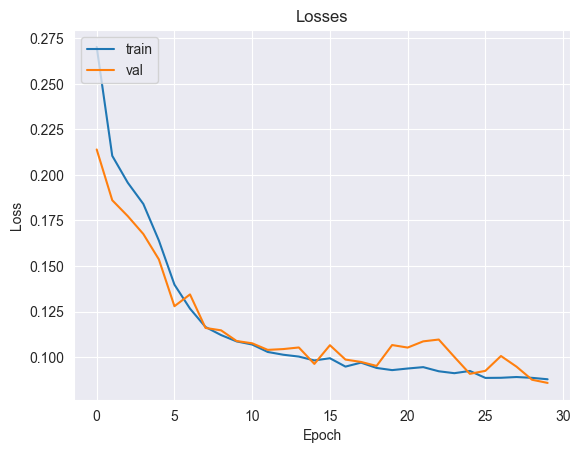

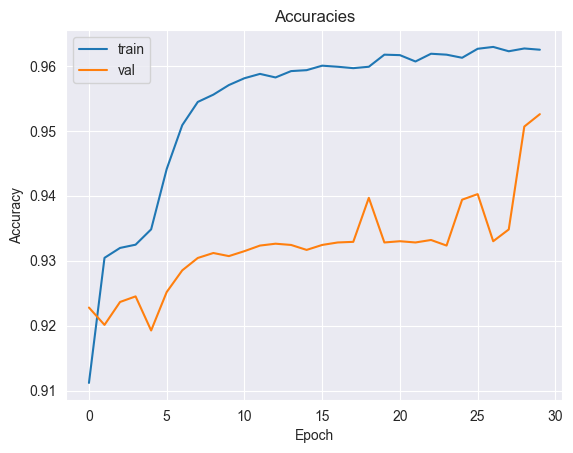

In [184]:
history = model.fit(
    X_train_scaler, y_train, epochs=30,
    batch_size=32,
    validation_split=0.2,
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Найкращі результати при передбаченні показала наступна модель.

In [185]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [187]:
model.fit(
    X_train_scaler, y_train, epochs=30,
    batch_size=32,
    validation_split=0.2,
)

y_pred = model.predict(X_test_scaler)

y_pred_binary = (y_pred >= 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))

Epoch 1/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9193 - loss: 0.2520 - val_accuracy: 0.9343 - val_loss: 0.1808
Epoch 2/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9336 - loss: 0.1991 - val_accuracy: 0.9230 - val_loss: 0.1976
Epoch 3/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9312 - loss: 0.1985 - val_accuracy: 0.9258 - val_loss: 0.1824
Epoch 4/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9346 - loss: 0.1836 - val_accuracy: 0.9242 - val_loss: 0.1697
Epoch 5/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9357 - loss: 0.1724 - val_accuracy: 0.9285 - val_loss: 0.1339
Epoch 6/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9414 - loss: 0.1515 - val_accuracy: 0.9278 - val_loss: 0.1229
Epoch 7/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9492 - loss: 0.1311 - val_accuracy: 0.9381 - val_loss: 0.1120
Epoch 8/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9565 - loss: 0.1187 - 

Тестування моделі на перевірочному дата сеті

In [188]:
y_pred = model.predict(test_X_scaler)

y_pred_binary = (y_pred >= 0.5).astype(int)

print(classification_report(test_Y, y_pred_binary))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2239
           1       0.98      0.96      0.97      2761

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



Text(0.5, 3.722222222222216, 'Predicted')

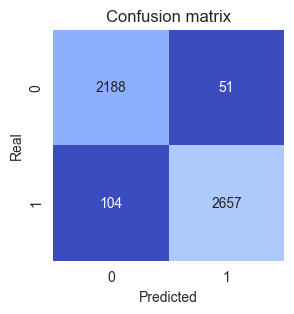

In [189]:
cm = confusion_matrix(test_Y, y_pred_binary)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Дана модель нейронної мережі показала також дуже високий результат точності передбачення, а саме 97%, тому також зберігаємо модель.

In [190]:
joblib.dump(model,'../models/NN_model_Olesia.pkl')

['../models/NN_model_Olesia.pkl']

При виборі моделі протестовано та проаналізовано роботу 5 різних моделей для даного датасету.

Так, наступними моделями було показані такі результати:
Logistic Regression - 93%
Linear SVC(accoding to documentation model used for big datasets) - 93%
Decision Tree - 97%
Random Forest Classifier - 94%
Neural Networks - 97%

Найкращий результат показали модель Decision Tree i Neural Networks.